In [1]:
from pdf2image import convert_from_path

def pdf_to_png(pdf_path, output_folder, dpi=300):
    # Chuyển đổi PDF thành các ảnh với độ phân giải cao
    images = convert_from_path(pdf_path, dpi=dpi)
    
    for i, image in enumerate(images):
        # Lưu từng trang PDF dưới dạng ảnh PNG
        image_path = f"{output_folder}/page_{i + 1}.png"
        image.save(image_path, 'PNG')
        print(f"Saved {image_path}")


# Đường dẫn đến tệp PDF và thư mục lưu ảnh PNG
pdf_path = 'data/C.pdf'
output_folder = 'data'

# Thực hiện chuyển đổi
pdf_to_png(pdf_path, output_folder,dpi=800)


Saved data/page_1.png


In [3]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
image_path = 'data/page_1.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


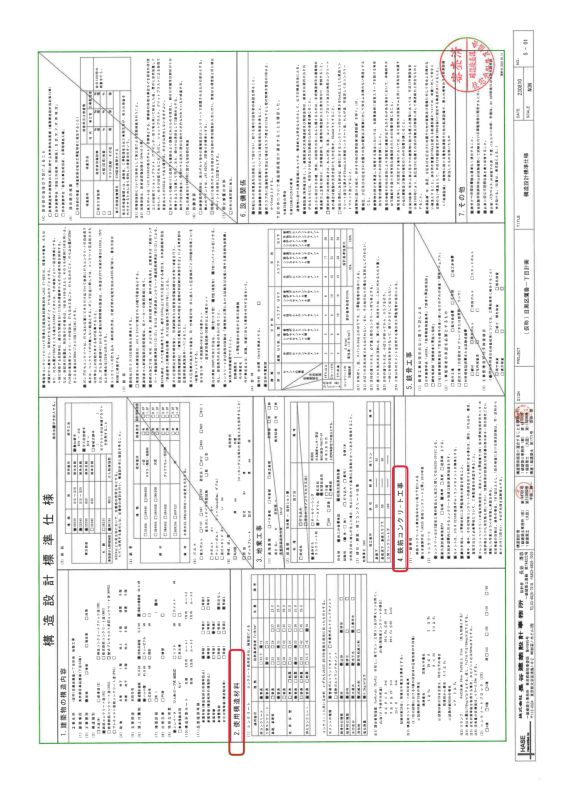

In [16]:
# Áp dụng ngưỡng hóa Otsu's Thresholding kết hợp với nhị phân nghịch đảo
_, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tìm các contours trong ảnh nhị phân
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tìm contours của bảng lớn nhất
max_contour = max(contours, key=cv2.contourArea)

# Vẽ contours lớn nhất lên ảnh gốc để kiểm tra
image_with_contour = image.copy()
cv2.drawContours(image_with_contour, [max_contour], -1, (0, 255, 0), 3)

# Hiển thị ảnh với contour lớn nhất
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_contour, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Saved data/cell_1.png


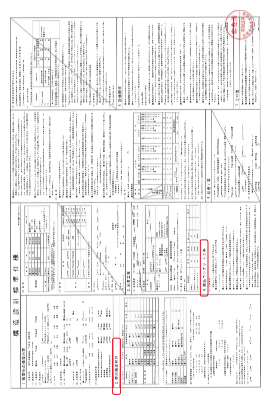

Saved data/cell_2.png


In [4]:


# Áp dụng ngưỡng hóa Otsu's Thresholding kết hợp với nhị phân nghịch đảo
_, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tìm các contours trong ảnh nhị phân
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contour = image.copy()
cv2.drawContours(image_with_contour, [contours[1]], -1, (0, 255, 0), 3)

# Lọc và lưu các ô của bảng lớn nhất
output_folder = 'data'
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    cell_image = image[y:y+h, x:x+w]
    output_path = f'{output_folder}/cell_{i + 1}.png'
    cv2.imwrite(output_path, cell_image)
    print(f"Saved {output_path}")

    # Hiển thị từng ô của bảng lớn nhất
    cell_image_rgb = cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(cell_image_rgb)
    plt.axis('off')
    plt.show()


In [5]:
img = cv2.imread('data/cell_1.png')
print(img.shape)
h_1,w_1,_=img.shape

(8728, 5689, 3)


In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/page_1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

h_1, w_1, _ = img.shape
i = 0

for c in contours:
    if cv2.contourArea(c) > h_1 * w_1 / 50:
        (x, y, w, h) = cv2.boundingRect(c)
        # cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 15)

        # Hiển thị ảnh gốc với các hộp giới hạn tô đỏ
        # plt.figure(figsize=(5, 5))
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        # Cắt và hiển thị từng ô đã được tô màu đỏ
        cell_image = img[y:y+h, x:x+w]
        # plt.figure(figsize=(5, 5))
        # plt.imshow(cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        # Lưu từng ô đã cắt ra
        output_path = f'data/cell/cell_{i + 1}.png'
        cv2.imwrite(output_path, cell_image)
        print(f"Saved {output_path}")
        i += 1


Saved data/cell/cell_1.png
Saved data/cell/cell_2.png
Saved data/cell/cell_3.png
Saved data/cell/cell_4.png
Saved data/cell/cell_5.png
Saved data/cell/cell_6.png
Saved data/cell/cell_7.png
Saved data/cell/cell_8.png
Saved data/cell/cell_9.png
Saved data/cell/cell_10.png
Saved data/cell/cell_11.png
Saved data/cell/cell_12.png
Saved data/cell/cell_13.png
